In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

sns.set_theme()
%load_ext sql

Unfallart = {
1 : "Zusammenstoß m. anfahrendem/anhaltendem/ruhendem Fahrzeug",
2 : "Zusammenstoß m. vorausfahrendem/wartendem Fahrzeug",
3 : "Zusammenstoß m. seitlich in gleicher Richtung fahrendem Fahrzeug",
4 : "Zusammenstoß m. entgegenkommendem Fahrzeug",
5 : "Zusammenstoß m. einbiegendem/kreuzendem Fahrzeug",
6 : "Zusammenstoß zw. Fahrzeug und Fußgänger",
7 : "Aufprall auf Fahrbahnhindernis",
8 : "Abkommen von Fahrbahn nach rechts",
9 : "Abkommen von Fahrbahn nach links",
0 : "Unfall anderer Art"}

Unfallkategorie = {1 : "Unfall mit Getöteten",
2 : "Unfall mit Schwerverletzten",
3 : "Unfall mit Leichtverletzten"}


In [2]:
data = pd.read_csv("Data\AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2019_Datensatz.csv", encoding = "iso-8859-15", delimiter=";", decimal=",")

data_b = data[data["IstRad"]==1]
data['UKATEGORIE']= data['UKATEGORIE'].replace(Unfallkategorie) 
data['UART']= data['UART'].replace(Unfallart) 

In [3]:
data.info()
#data.describe()
#data_b.describe()
#data.kurtosis()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13390 entries, 0 to 13389
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     13390 non-null  int64  
 1   LAND         13390 non-null  int64  
 2   BEZ          13390 non-null  int64  
 3   LOR          13390 non-null  int64  
 4   STRASSE      13390 non-null  object 
 5   UJAHR        13390 non-null  int64  
 6   UMONAT       13390 non-null  int64  
 7   USTUNDE      13390 non-null  int64  
 8   UWOCHENTAG   13390 non-null  int64  
 9   UKATEGORIE   13390 non-null  object 
 10  UART         13390 non-null  object 
 11  UTYP1        13390 non-null  int64  
 12  ULICHTVERH   13390 non-null  int64  
 13  IstRad       13390 non-null  int64  
 14  IstPKW       13390 non-null  int64  
 15  IstFuss      13390 non-null  int64  
 16  IstKrad      13390 non-null  int64  
 17  IstGkfz      13390 non-null  int64  
 18  IstSonstige  13390 non-null  float64
 19  USTR

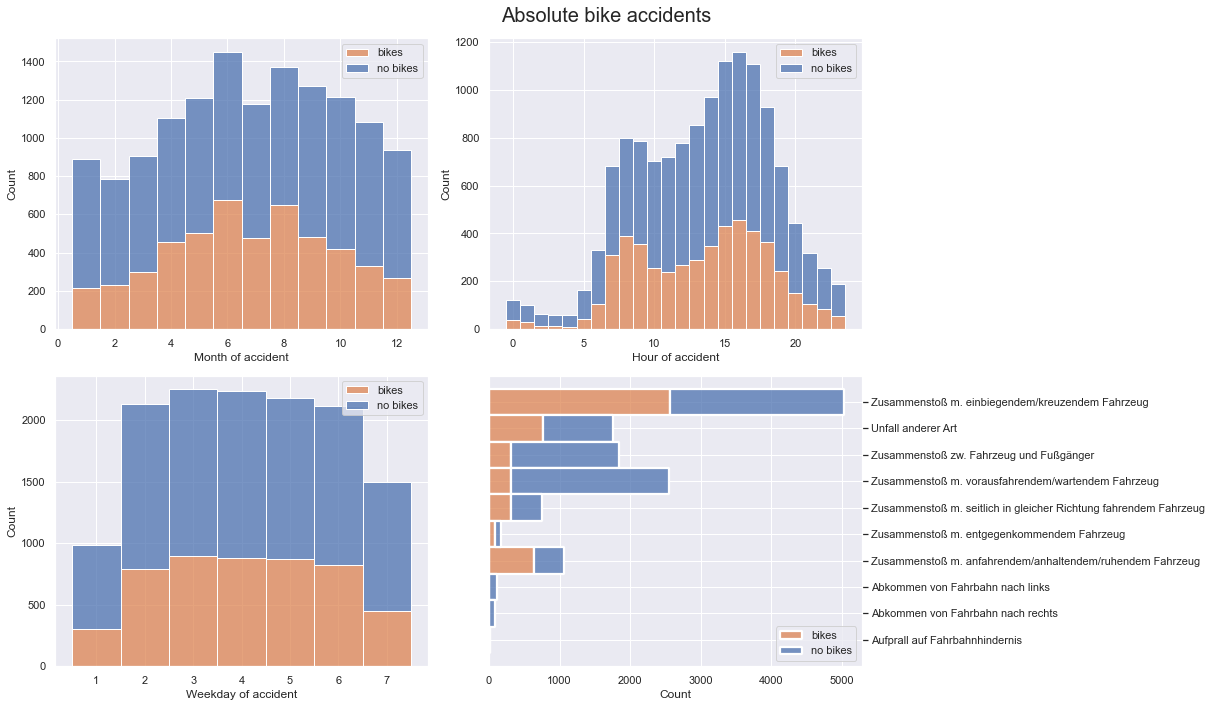

In [20]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(17,10))
#gs = gridspec.GridSpec(1, 2, width_ratios=[1,3]) 

p1 = sns.histplot(data,x = "UMONAT",
                  bins=12,kde=False,ax=axs[0,0],
                  hue="IstRad",discrete = True,multiple="stack")
p1.set(xlabel="Month of accident")
p1.legend(['bikes', "no bikes"])

p2 = sns.histplot(data, x = "USTUNDE",
                  bins=24,kde=False, ax=axs[0,1],
                  hue="IstRad",discrete = True, multiple = "stack")
p2.set(xlabel="Hour of accident")
p2.legend(['bikes', "no bikes"])

p3 = sns.histplot(data, x = "UWOCHENTAG",
                  bins=7, kde=False, ax=axs[1,0],
                  hue="IstRad", discrete = True, multiple = "stack")
p3.set(xlabel="Weekday of accident")
p3.legend(['bikes', "no bikes"])

p4 = sns.histplot(data, y = "UART",
                  kde=False,ax=axs[1,1],
                  hue="IstRad",discrete = True, multiple="stack")
p4.set(xlabel="Count",ylabel="")
p4.yaxis.set_label_position("right")
p4.yaxis.tick_right()

locs, labels = plt.xticks()
plt.setp(labels, rotation=0)
p4.legend(['bikes', "no bikes"])

fig.suptitle("Absolute bike accidents",size=20) 
plt.tight_layout()
fig.savefig("abs_bike_acc.pdf")

AxesSubplot(0.125,0.125;0.775x0.755)


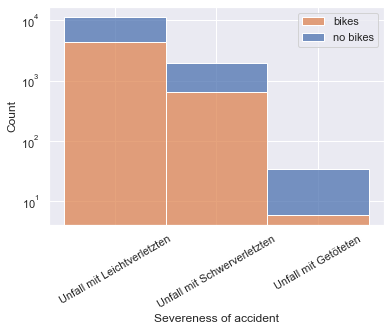

In [41]:
p = sns.histplot(data, x = "UKATEGORIE",
                  kde=False,
                  hue="IstRad",discrete = True, multiple="stack")
p.set(xlabel="Severeness of accident",yscale="log")
p.legend(['bikes', "no bikes"])

locs, labels = plt.xticks()
plt.setp(labels, rotation=30)

print(p)


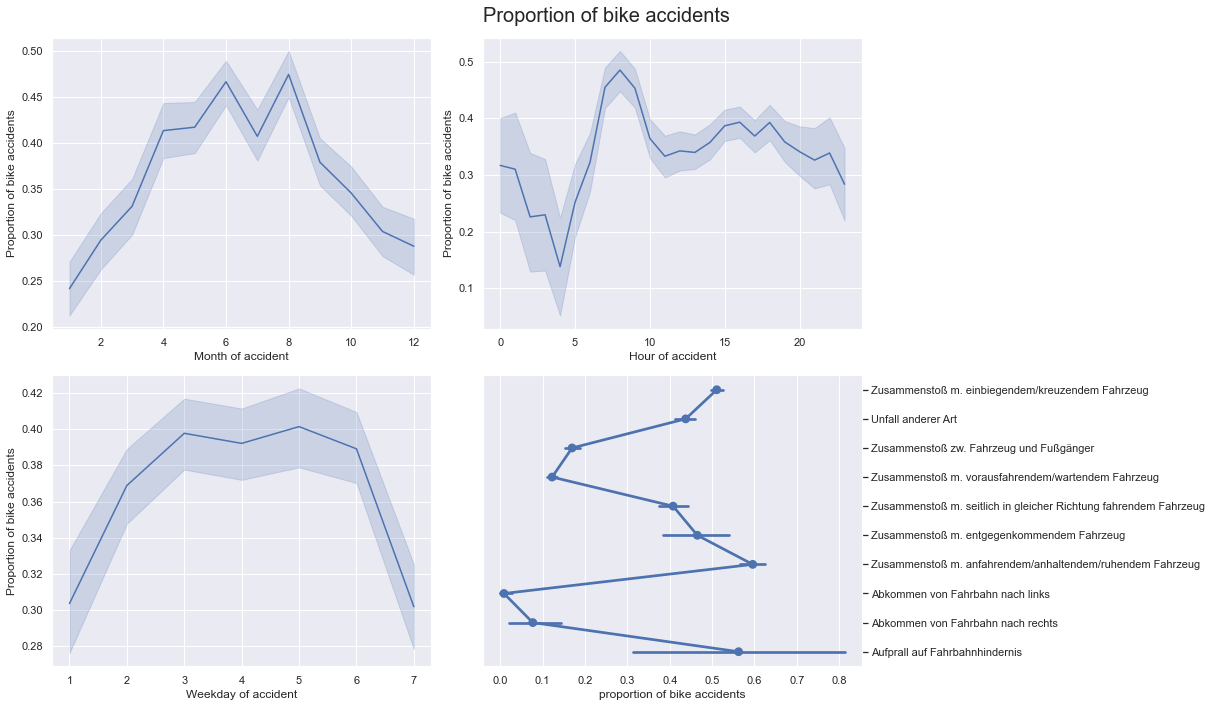

In [21]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(17,10))
#gs = gridspec.GridSpec(1, 2, width_ratios=[1,3]) 

p1 = sns.lineplot(data=data,
                  x = "UMONAT",y="IstRad",ax=axs[0,0])
p1.set(xlabel="Month of accident",ylabel="Proportion of bike accidents")

p2 = sns.lineplot(data=data,
                  x = "USTUNDE",y="IstRad",ax=axs[0,1])
p2.set(xlabel="Hour of accident",ylabel="Proportion of bike accidents")


p3 = sns.lineplot(data=data,
                  x = "UWOCHENTAG",y="IstRad",ax=axs[1,0])
p3.set(xlabel="Weekday of accident",ylabel="Proportion of bike accidents")

p4 = sns.pointplot(data=data,
                  y = "UART",x="IstRad",ax=axs[1,1])
p4.set(xlabel="proportion of bike accidents",ylabel="")
p4.yaxis.set_label_position("right")
p4.yaxis.tick_right()


fig.suptitle("Proportion of bike accidents",size=20) 
plt.tight_layout()
fig.savefig("prop_bike_acc.pdf")